# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking.

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [ ]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct.

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [ ]:
from sklearn.linear_model import Perceptron

def getXY (file_name):
  Data_Set = arff.loadarff(file_name)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  return X, y

def perceptron (file_name, iter=None):
  if iter==None:
    clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
  else:
    clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=iter)
  X, y = getXY(file_name)
  clf.fit(X, y)
  return clf.coef_, clf.intercept_, clf.score(X, y)

print(perceptron('debug.arff', 10))

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.01 seconds.
--

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [ ]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.

print(perceptron('evaluation.arff', 10))

-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.01

*Discussion - Open this box and type in your discussion.*  Note that after each exercise you will have a chance to discuss your effort and results.

Results:

-Final Weights = [[-4.28857497 -2.390381 -3.0160324 -1.1686672]]

-Bias/Intercept = [5.2]

-Accuracy = [.977]

Discussion:

In this task I ran my model on the evaluation dataset and reported the final accuracy, weights, and bias. I used the exact same hyperparameters as the debug dataset, subbed in the evaluation dataset, and recorded the results of running on said dataset. I did this because you told me to. My output should match the grading output. This is because I used the exact same parameters. Note that I used the exact same code via function calling. I was surprised to observe that the accuracy was higher than for the debug dataset. I am not sure why this is the case, but my hypothesis is that there was more data to train on.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class.
- One data set should be linearly separable and the other not.
- Show or print your datasets

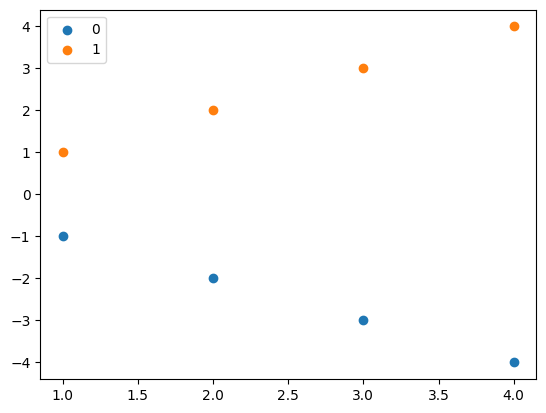

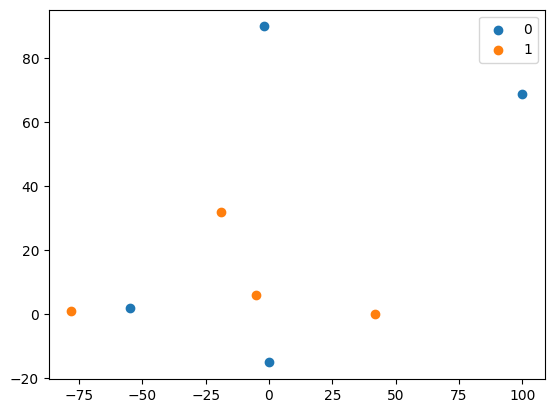

In [ ]:
# Create and show the 2 datasets.
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.
import matplotlib.pyplot as plt

def show_dataset(file_name, line_x=None, line_y=None):
  X, y = getXY(file_name)
  plt.figure()
  for i in range(len(np.unique(y))):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=str(i))
  if line_x is not None and line_y is not None:
    plt.plot(line_x, line_y)
  plt.legend()
  plt.show()

show_dataset('data1.arff')
show_dataset('data2.arff')

### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [ ]:
# Train and print results with both datasets
coef1, inter1, score1 = perceptron('data1.arff')
print(coef1, inter1, score1)
coef2, inter2, score2 = perceptron('data2.arff')
print(coef2, inter2, score2)

-- Epoch 1
Norm: 0.20, NNZs: 1, Bias: 0.000000, T: 8, Avg. loss: 0.012500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 1, Bias: 0.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 1, Bias: 0.000000, T: 24, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.20, NNZs: 1, Bias: 0.000000, T: 32, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.20, NNZs: 1, Bias: 0.000000, T: 40, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.20, NNZs: 1, Bias: 0.000000, T: 48, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.20, NNZs: 1, Bias: 0.000000, T: 56, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
[[0.  0.2]] [0.] 1.0
-- Epoch 1
Norm: 4.97, NNZs: 2, Bias: 0.000000, T: 8, Avg. loss: 56.300000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.99, NNZs: 2, Bias: 0.000000, T: 16, 

*Discussion*

Results:

-Dataset 1:

--Final Weights = [[0.0 0.2]]

--Bias/Intercept = [0]

--Accuracy = [1.0]

-Dataset 2:

--Final Weights = [[3.1 -5.4]]

--Bias/Intercept = [0.1]

--Accuracy = [0.5]

Discussion:

In this task I classified on linearly separable and non-linearly separable data. I set up a linearly separable dataset, set up a non-linearly separable dataset, and ran the perceptron on both of them. I did this because it showcased how the linear perceptron is only good for linearly separable data. The non-linearly separable accuracy is terrible. This is because linear perceptrons are not made to classify non-linearly separable data. Note that the linearly separable accuracy is great. I was not surprised to observe anything in this task. This is because the point it was trying to make is obvious.

### 2.3 (10%) Graph the datasets and their corresponding decision line

 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Percptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

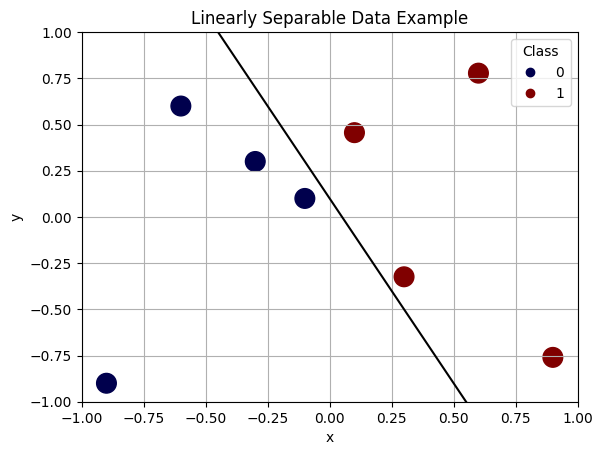

In [ ]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

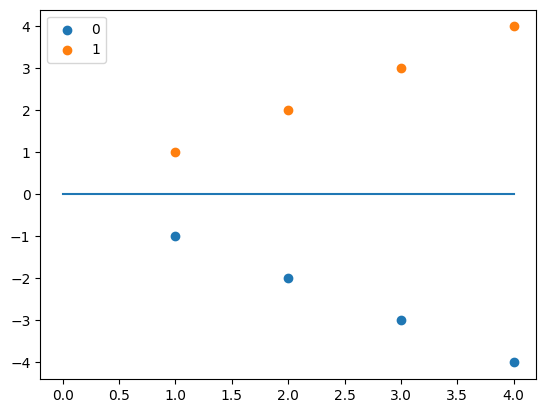

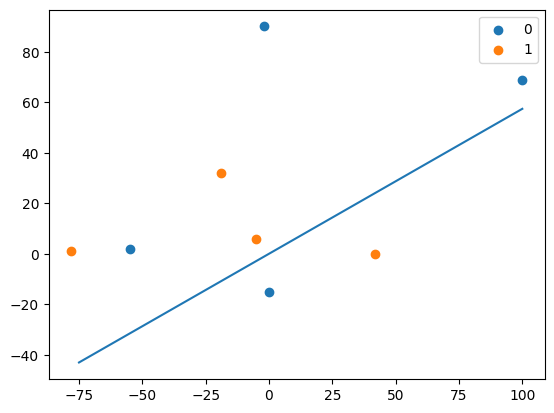

In [ ]:
# Graph datasets and decision lines for both cases.
def my_function(w1, w2, theta, x):
  return (-w1/w2)*x + theta/w2

x = np.linspace(0, 4, 100)
y = my_function(coef1[0][0], coef1[0][1], inter1[0], x)
show_dataset('data1.arff', x, y)

x = np.linspace(-75, 100, 100)
y = my_function(coef2[0][0], coef2[0][1], inter2[0], x)
show_dataset('data2.arff', x, y)

*Discussion*

Results:

-The graphs and separation lines for datasets 1 and 2 are shown above.

Discussion:

In this task I graphed the datasets and their corresponding decision lines. I plotted the data points on graphs, calculated the decision lines, and plotted said lines alongside the data points. I did this because it shows the decision lines in an easily-understandable way. The first decision line cleanly splits the two classes, but the second does not. This is because the first dataset is linearly separable, whereas the second dataset isn't. Note that the second line attempts to divide the classes but fails at doing so. I was surprised to observe that the second line didnt have a steep downwards slope around the x=0 mark. I am not sure why it didn't divide here and thereby increase the accuracy to 0.75, but my hypothesis is that the slope learning rate was too slow to let it become something like -50x.

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion*

Discussion:

Perceptrons in general will not get perfect accuracy on non-linearly separable data because it is impossible to get all points from class A on one side of a straight line without one or more points from class B being on that same side of the line. "Non-linearly separable data" literally means that classes A and B can't be separated using a straight (a.k.a. linear) line.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [ ]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def getVotingXY (file_name):
  Data_Set = arff.loadarff(file_name)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_en = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = np.array(Data_Set_en)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  return X, y

def table_dataset(file_name, test_size):
  X, y = getVotingXY(file_name)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  clf = Perceptron(shuffle=False, verbose=0, eta0=1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  train_accuracy = clf.score(X_train, y_train)
  test_accuracy = accuracy_score(y_test, y_pred)

  return train_accuracy, test_accuracy, clf.n_iter_

print('trial | split | train accuracy | test accuracy | epochs')
tot_train_avg = 0
tot_test_avg = 0
tot_epochs = 0
for row in range(1,6):
    test_size = round(0.1*row, 1)
    row_data = table_dataset('voting-dataset.arff', test_size)
    tot_train_avg += round(row_data[0],3)
    tot_test_avg += round(row_data[1],3)
    tot_epochs += row_data[2]
    print(f'  {row}   |  {test_size}  |     {round(row_data[0],3)}      |     {round(row_data[1],3)}     |   {row_data[2]}')
print(f' avg  |  n/a  |     {round(tot_train_avg/5,3)}      |     {round(tot_test_avg/5,3)}     |   {round(tot_epochs/5,1)}')

trial | split | train accuracy | test accuracy | epochs
  1   |  0.1  |     0.966      |     0.936     |   9
  2   |  0.2  |     0.959      |     0.946     |   13
  3   |  0.3  |     0.969      |     0.942     |   9
  4   |  0.4  |     0.964      |     0.968     |   12
  5   |  0.5  |     0.965      |     0.944     |   12
 avg  |  n/a  |     0.965      |     0.947     |   11.0


### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result.
- Which specific features are most critical for the voting task, and which are least critical?

In [ ]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning

def vote_perceptron (file_name, iter=None, random=None):
  if iter==None:
    clf = Perceptron(shuffle=False, verbose=0, eta0=.1, random_state=random)
  else:
    clf = Perceptron(shuffle=False, verbose=0, eta0=.1, max_iter=iter, random_state=random)
  X, y = getVotingXY(file_name)
  clf.fit(X, y)
  return clf.coef_, clf.intercept_, clf.score(X, y)

print(vote_perceptron('voting-dataset.arff'))

(array([[ 0.00000000e+00, -2.00000000e-01, -6.00000000e-01,
         1.70000000e+00,  3.00000000e-01, -1.00000000e-01,
         3.00000000e-01,  4.00000000e-01, -7.00000000e-01,
         2.00000000e-01, -1.00000000e+00,  1.00000000e-01,
        -2.00000000e-01,  2.77555756e-17, -3.00000000e-01,
         5.00000000e-01]]), array([-1.]), 0.96529284164859)


Discuss how the different features effect prediction

Results:

-Final Weights = [[0.0, -0.2, -0.6, 1.7, 0.3, -0.1, 0.3, 0.4, -0.7, 0.2, -1.0,  0.1, -0.2, 2.776e-17, -0.3, 0.5]]

-Bias/Intercept = [-1]

-Accuracy = [0.965]

Discussion:

-What the model has learned: Physician fee freeze, mx missile and synfuels corporation cutback are the largest deciding factors for a person's party. Handicapped infants, religious groups in schools, education spending and crime are the smallest deciding factors for a person's party.

-How the features affect the result: Being pro- physician fee freeze (and pro- other positive-weighted items) pulls your predicted party towards republican. Being pro- mx missile and synfuels corporation cutback (and pro- other negative-weighted items) pulls your predicted party towards democrat.

-Most critical features: 4 (physician-fee-freeze), 9 (mx-missile), and 11 (synfuels-corporation-cutback).

-Least critical features: 1 (handicapped-infants), 6 (religious-groups-in-schools), 12 (education-spending), 14 (crime).

### 3.3 (15%) Misclassification rate vs epochs

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 66% and let that be the first point on your graph. Since there are 3 output classes, random guessing would only get it right about 1/3 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

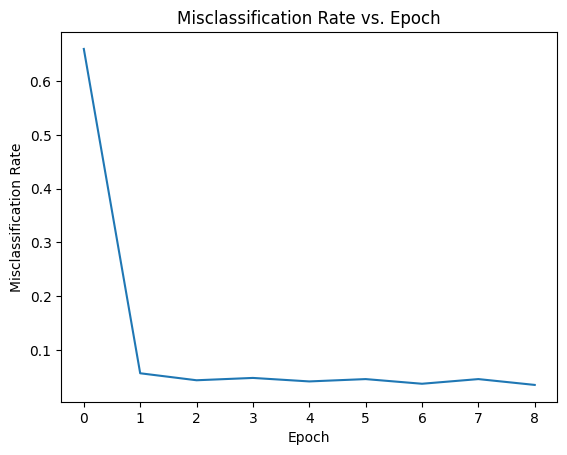

In [ ]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.

def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

X, y = getVotingXY('voting-dataset.arff')

clf1 = Perceptron(shuffle=False, verbose=0, eta0=.1, random_state=1)
clf1.fit(X,y)

misclassification_rate = []
misclassification_rate.append(0.66)
clf2 = Perceptron(shuffle=False, verbose=0, eta0=.1, max_iter=1, warm_start=True, random_state=1)
for i in range(clf1.n_iter_):
  clf2.fit(X,y)
  misclassification_rate.append(1-clf2.score(X,y))

plot_misclassification(misclassification_rate)

*Show table and discuss*

In this task I learned with the perceptron once on the full voting data set and graphed the misclassification rate. I assumed the initial misclassification rate is 66% and let that be the first point on the graph, ran the perceptron until convergence with random_state=1 to see how many epochs it took (n_iter_) and did clf.fit with max_iter=1 and warm_start=True to loop through epochs one at a time. I did this because it allowed me to gather the misclassification rate for each epoch and graph them. The misclassification rate drops significantly after the first epoch. This is because there is enough data to discover the pattern within one epoch. Note that the misclassification rate levels out after the first iteration. I was surprised to observe that it didn't change much after the first iteration. I am not sure why it only marginally increased, but my hypothesis is that there was enough data in the database to basically completely lock down the pattern in only one epoch.

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [ ]:
# Run the model with different hyperparameters
X, y = getVotingXY('voting-dataset.arff')

print('Default:')
clf1 = Perceptron(shuffle=False, verbose=0, eta0=.1)
clf1.fit(X,y)
print(clf1.coef_, clf1.intercept_, clf1.score(X, y))

print('Shuffle:')
clf2 = Perceptron(shuffle=True, verbose=0, eta0=.1)
clf2.fit(X,y)
print(clf2.coef_, clf2.intercept_, clf2.score(X, y))

print('Learning rate:')
clf3 = Perceptron(shuffle=False, verbose=0, eta0=.5)
clf3.fit(X,y)
print(clf3.coef_, clf3.intercept_, clf3.score(X, y))

print('Verbose:')
clf4 = Perceptron(shuffle=False, verbose=1, eta0=.1)
clf4.fit(X,y)
print(clf4.coef_, clf4.intercept_, clf4.score(X, y))

print('Bias:')
clf5 = Perceptron(shuffle=False, verbose=0, eta0=.1, fit_intercept=False)
clf5.fit(X,y)
print(clf5.coef_, clf5.intercept_, clf5.score(X, y))

print('Random state:')
clf6 = Perceptron(shuffle=False, verbose=0, eta0=.1, random_state=1)
clf6.fit(X,y)
print(clf6.coef_, clf6.intercept_, clf6.score(X, y))

print('Warm start:')
clf7 = Perceptron(shuffle=False, verbose=0, eta0=.1, warm_start=True)
clf7.fit(X,y)
print(clf7.coef_, clf7.intercept_, clf7.score(X, y))

Default:
[[ 0.00000000e+00 -2.00000000e-01 -6.00000000e-01  1.70000000e+00
   3.00000000e-01 -1.00000000e-01  3.00000000e-01  4.00000000e-01
  -7.00000000e-01  2.00000000e-01 -1.00000000e+00  1.00000000e-01
  -2.00000000e-01  2.77555756e-17 -3.00000000e-01  5.00000000e-01]] [-1.] 0.96529284164859
Shuffle:
[[-1.00000000e-01 -2.00000000e-01 -8.00000000e-01  1.60000000e+00
   2.00000000e-01 -3.00000000e-01  7.00000000e-01  6.00000000e-01
  -7.00000000e-01  4.00000000e-01 -9.00000000e-01  1.00000000e-01
  -2.77555756e-17  2.77555756e-17 -5.00000000e-01  5.00000000e-01]] [-0.9] 0.9609544468546638
Learning rate:
[[ 1.  -1.5 -3.5  9.5  1.5 -1.   0.5  2.5 -4.5  1.  -4.5  0.5  0.   0.
  -1.5  3. ]] [-4.5] 0.9674620390455532
Verbose:
-- Epoch 1
Norm: 1.26, NNZs: 13, Bias: -0.200000, T: 461, Avg. loss: 0.024078
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 13, Bias: -0.400000, T: 922, Avg. loss: 0.018004
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 16, Bias: -

Discussion

In this task I experimented briefly with each of the hyperparameters. I copied the code for each parameter, changed said hyperparameter, and printed the output for each change. I did this because you told me to. Increasing the learning rate improves accuracy. This is because the perceptron learns faster and either overfits the data or jumps over some local optima. Note that turning verbose on outputs stats for each epoch. I was surprised to observe that turning bias off improves the accuracy. I am not sure why this happens, but my hypothesis is that it overfits the data.

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [ ]:
# Load and Train on your dataset and report results
Data_Set = arff.loadarff('iris.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_en = Data_Set_df.apply(LabelEncoder().fit_transform)
Data_Set_np = np.array(Data_Set_en)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

clf = Perceptron(shuffle=False, verbose=0, eta0=.1)
clf.fit(X,y)
print(clf.coef_, clf.intercept_, clf.score(X, y))

[[-0.9  4.7 -1.7 -1. ]
 [ 8.  -5.4 -6.9 -7.6]
 [-5.6 -2.  10.6  8. ]] [ 0.4  0.6 -1.9] 0.6533333333333333


*Discuss how the perceptron did on the data set and why you think it performed as such.*

Results:

-Final Weights =
[[-0.9  4.7 -1.7 -1. ]
 [ 8.  -5.4 -6.9 -7.6]
 [-5.6 -2.  10.6  8. ]]

-Bias/Intercept = [ 0.4  0.6 -1.9]

-Accuracy = [.653]

Discussion:

In this task I used the perceptron to learn one other data set of my choice. I found the Iris dataset on the UV Irvine Data Repository, turned it from a .data file into a .arff file, and learned the perceptron on its data. I did this because I wanted to see how the perceptron performed on the Iris dataset. The perceptron used three different lines to separate the classes. This is because the data has three classes of setosa, versicolor and virginica. Note that for each of these lines there are different weights and biases. I was surprised to observe that the accuracy was rather low, even when running to convergence. I am not sure why the accuracy is so low, but my hypothesis is that it is a natural result of trying to separate three classes instead of two.